Chronic Kidney Disease (CKD) or chronic renal disease has become a major issue with a steady growth rate. A person can only survive without kidneys for an average time of 18 days, which makes a huge demand for a kidney transplant and Dialysis. It is important to have effective methods for early prediction of CKD. Machine learning methods are effective in CKD prediction. This work proposes a workflow to predict CKD status based on clinical data, incorporating data prepossessing, a missing value handling method with collaborative filtering and attributes selection. Out of the 11 machine learning methods considered, the extra tree classifier and random forest classifier are shown to result in the highest accuracy and minimal bias to the attributes. The research also considers the practical aspects of data collection and highlights the importance of incorporating domain knowledge when using machine learning for CKD status prediction.

![image.png](https://www.healio.com/~/media/slack-news/stock-images/rheumatology/rheum-images/kidney.jpeg)

## Machine Learning Approach to Predict the  Chronic Kidney Disease

It identifies the limitations in handling missing values when analysing CKD data, proposes a new method to handle missing values and presents the evaluation of different methods based on UCI dataset. Further, this work also highlights the importance of statistical analysis as well as the domain knowledge of the features when making a
prediction based on clinical data related to CKD.

**chronic renal disease, machine learning, classification algorithms, extra tree classifier, random forest classifier,XGBoost**




![image.png](attachment:image.png)

# Data set we contains

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - haemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. lassification - class

# Feature description of the Data

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

## Install & Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Extract the Data-Set ( Kidney_Disease.csv )

In [ ]:
kidney=pd.read_csv('data.txt',sep = ",")

In [ ]:
kidney.shape

(5000, 26)

- It Indicates there are about **400** Rows and **26** Columns are present in our Data Set

In [1]:
kidney.head(13)

NameError: ignored

In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   int64  
 1   age             4863 non-null   float64
 2   bp              4718 non-null   float64
 3   sg              3125 non-null   float64
 4   al              3998 non-null   float64
 5   su              3710 non-null   float64
 6   rbc             3550 non-null   object 
 7   pc              3548 non-null   object 
 8   pcc             4866 non-null   object 
 9   ba              4903 non-null   object 
 10  bgr             4686 non-null   float64
 11  bu              4769 non-null   float64
 12  sc              4803 non-null   float64
 13  sod             3699 non-null   float64
 14  pot             4283 non-null   float64
 15  hemo            3846 non-null   float64
 16  pcv             4238 non-null   object 
 17  wc              3965 non-null   o

In [ ]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,5000.000000,4863.000000,4718.000000,3125.000000,3998.000000,3710.000000,4686.000000,4769.000000,4803.000000,3699.000000,4283.000000,3846.000000
mean,153.051600,35.549249,81.484103,1.017561,0.882191,1.059569,130.468630,80.630027,3.272655,136.826764,3.885781,12.507228
std,142.979408,25.431779,16.414781,0.006736,1.283789,1.782289,103.219393,93.588834,6.886626,16.494071,1.495379,4.007032
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,0.000000,19.000000,72.000000,1.012000,0.000000,0.000000,44.000000,1.500000,0.400000,130.300000,2.500000,10.200000
50%,144.000000,28.000000,78.000000,1.018000,0.000000,0.000000,111.000000,48.300000,0.510000,137.700000,3.300000,12.900000
75%,258.000000,52.000000,86.000000,1.025000,1.000000,1.000000,189.000000,117.000000,3.240000,145.200000,5.100000,15.500000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,10.900000,17.800000


# Performing Exploitory Data Analysis ( EDA )
- Modifying the Column Names as per our requirements

In [ ]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,108,36.0,93.0,1.014,2.0,NaN,normal,abnormal,present,notpresent,...,NaN,NaN,3.9,no,no,no,good,no,no,ckd
1,9,2.0,85.0,NaN,1.0,NaN,NaN,normal,notpresent,notpresent,...,35,NaN,NaN,no,yes,no,good,no,no,ckd
2,277,3.0,65.0,NaN,0.0,0.0,normal,NaN,notpresent,notpresent,...,36,6000,5.2,yes,no,no,good,no,no,notckd
3,214,79.0,69.0,NaN,1.0,0.0,normal,abnormal,notpresent,notpresent,...,35,NaN,NaN,yes,no,yes,good,yes,yes,ckd
4,59,46.0,76.0,NaN,NaN,0.0,normal,NaN,notpresent,notpresent,...,41,\t?,4.1,no,no,no,good,no,no,ckd


In [ ]:
kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
des = ['id','age',
           'blood pressure',
           'specific gravity',
           'albumin',
           'sugar',
           'red blood cells',
           'pus cell',
           'pus cell clumps',
           'bacteria',
           'blood glucose random',
           'blood urea',
           'serum creatinine',
           'sodium',
           'potassium',
           'haemoglobin',
           'packed cell volume',
           'white blood cell count',
           'red blood cell count',
           'hypertension',
           'diabetes mellitus',
           'coronary artery disease',
           'appetite',
           'pedal edema',
           'anemia',
           'class']


In [ ]:
des = pd.Series(des)

In [ ]:
kidney.columns=des.values

In [ ]:
kidney.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,108,36.0,93.0,1.014,2.0,NaN,normal,abnormal,present,notpresent,...,NaN,NaN,3.9,no,no,no,good,no,no,ckd
1,9,2.0,85.0,NaN,1.0,NaN,NaN,normal,notpresent,notpresent,...,35,NaN,NaN,no,yes,no,good,no,no,ckd
2,277,3.0,65.0,NaN,0.0,0.0,normal,NaN,notpresent,notpresent,...,36,6000,5.2,yes,no,no,good,no,no,notckd
3,214,79.0,69.0,NaN,1.0,0.0,normal,abnormal,notpresent,notpresent,...,35,NaN,NaN,yes,no,yes,good,yes,yes,ckd
4,59,46.0,76.0,NaN,NaN,0.0,normal,NaN,notpresent,notpresent,...,41,\t?,4.1,no,no,no,good,no,no,ckd


In [ ]:
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5000.0,153.051600,142.979408,0.000,0.000,144.000,258.000,399.000
age,4863.0,35.549249,25.431779,2.000,19.000,28.000,52.000,90.000
blood pressure,4718.0,81.484103,16.414781,50.000,72.000,78.000,86.000,180.000
specific gravity,3125.0,1.017561,0.006736,1.005,1.012,1.018,1.025,1.025
albumin,3998.0,0.882191,1.283789,0.000,0.000,0.000,1.000,5.000
sugar,3710.0,1.059569,1.782289,0.000,0.000,0.000,1.000,5.000
blood glucose random,4686.0,130.468630,103.219393,22.000,44.000,111.000,189.000,490.000
blood urea,4769.0,80.630027,93.588834,1.500,1.500,48.300,117.000,391.000
serum creatinine,4803.0,3.272655,6.886626,0.400,0.400,0.510,3.240,76.000
sodium,3699.0,136.826764,16.494071,4.500,130.300,137.700,145.200,163.000


In [ ]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that

In [ ]:
features=['packed cell volume','white blood cell count','red blood cell count']
for i in features:
    convert_dtype(kidney,i)

In [ ]:
kidney.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [ ]:
kidney.drop('id',inplace=True,axis=1)

# Performing Data cleaning

In [ ]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(kidney)

In [ ]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [ ]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [ ]:
# dirtiness in categorical data
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has ['normal' nan 'abnormal'] values


pus cell has ['abnormal' 'normal' nan] values


pus cell clumps has ['present' 'notpresent' nan] values


bacteria has ['notpresent' nan 'present'] values


hypertension has ['no' 'yes' nan] values


diabetes mellitus has ['no' 'yes' '\tno' '\tyes' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan '\tno'] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd' 'ckd\t'] values




In [ ]:
kidney['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
kidney['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [ ]:
# no dirtiness
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has ['normal' nan 'abnormal'] values


pus cell has ['abnormal' 'normal' nan] values


pus cell clumps has ['present' 'notpresent' nan] values


bacteria has ['notpresent' nan 'present'] values


hypertension has ['no' 'yes' nan] values


diabetes mellitus has ['no' 'yes' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




## Analysing distribution of each and every column

In [ ]:
len(num_col)

14

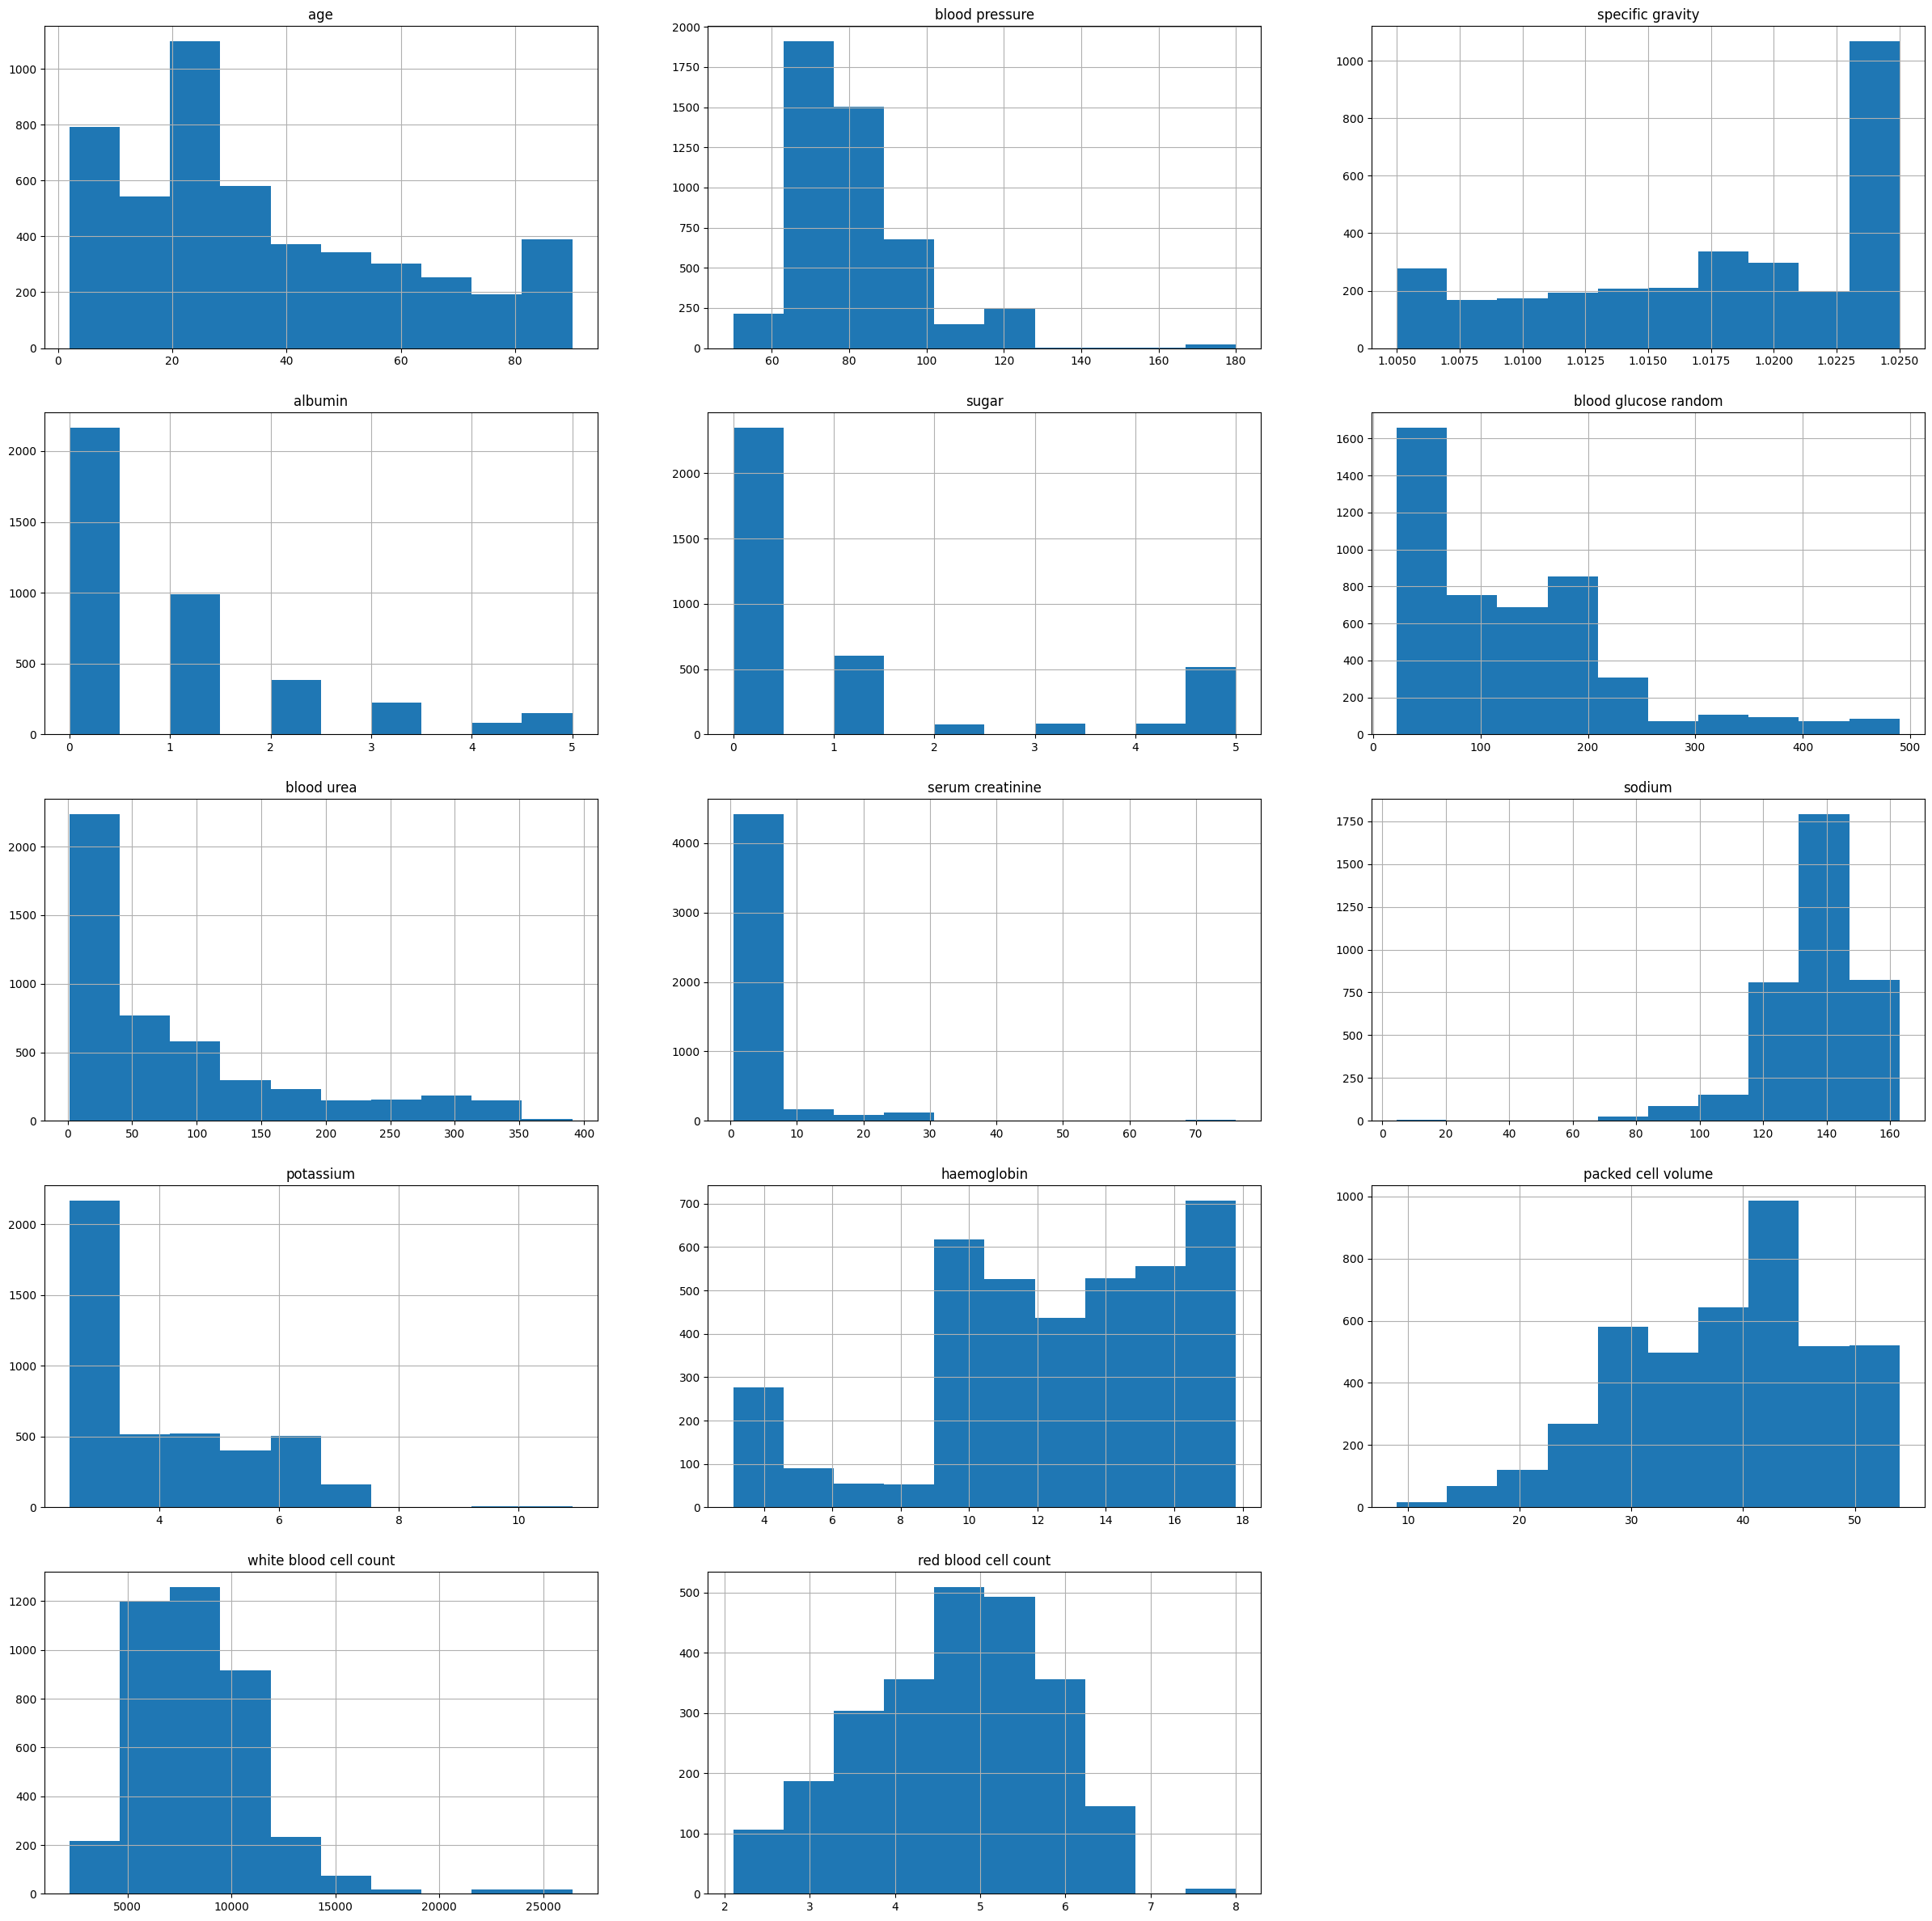

In [ ]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns
    kidney[feature].hist()
    plt.title(feature)

## Check Label distribution of categorical Data

In [ ]:
len(cat_col)

11

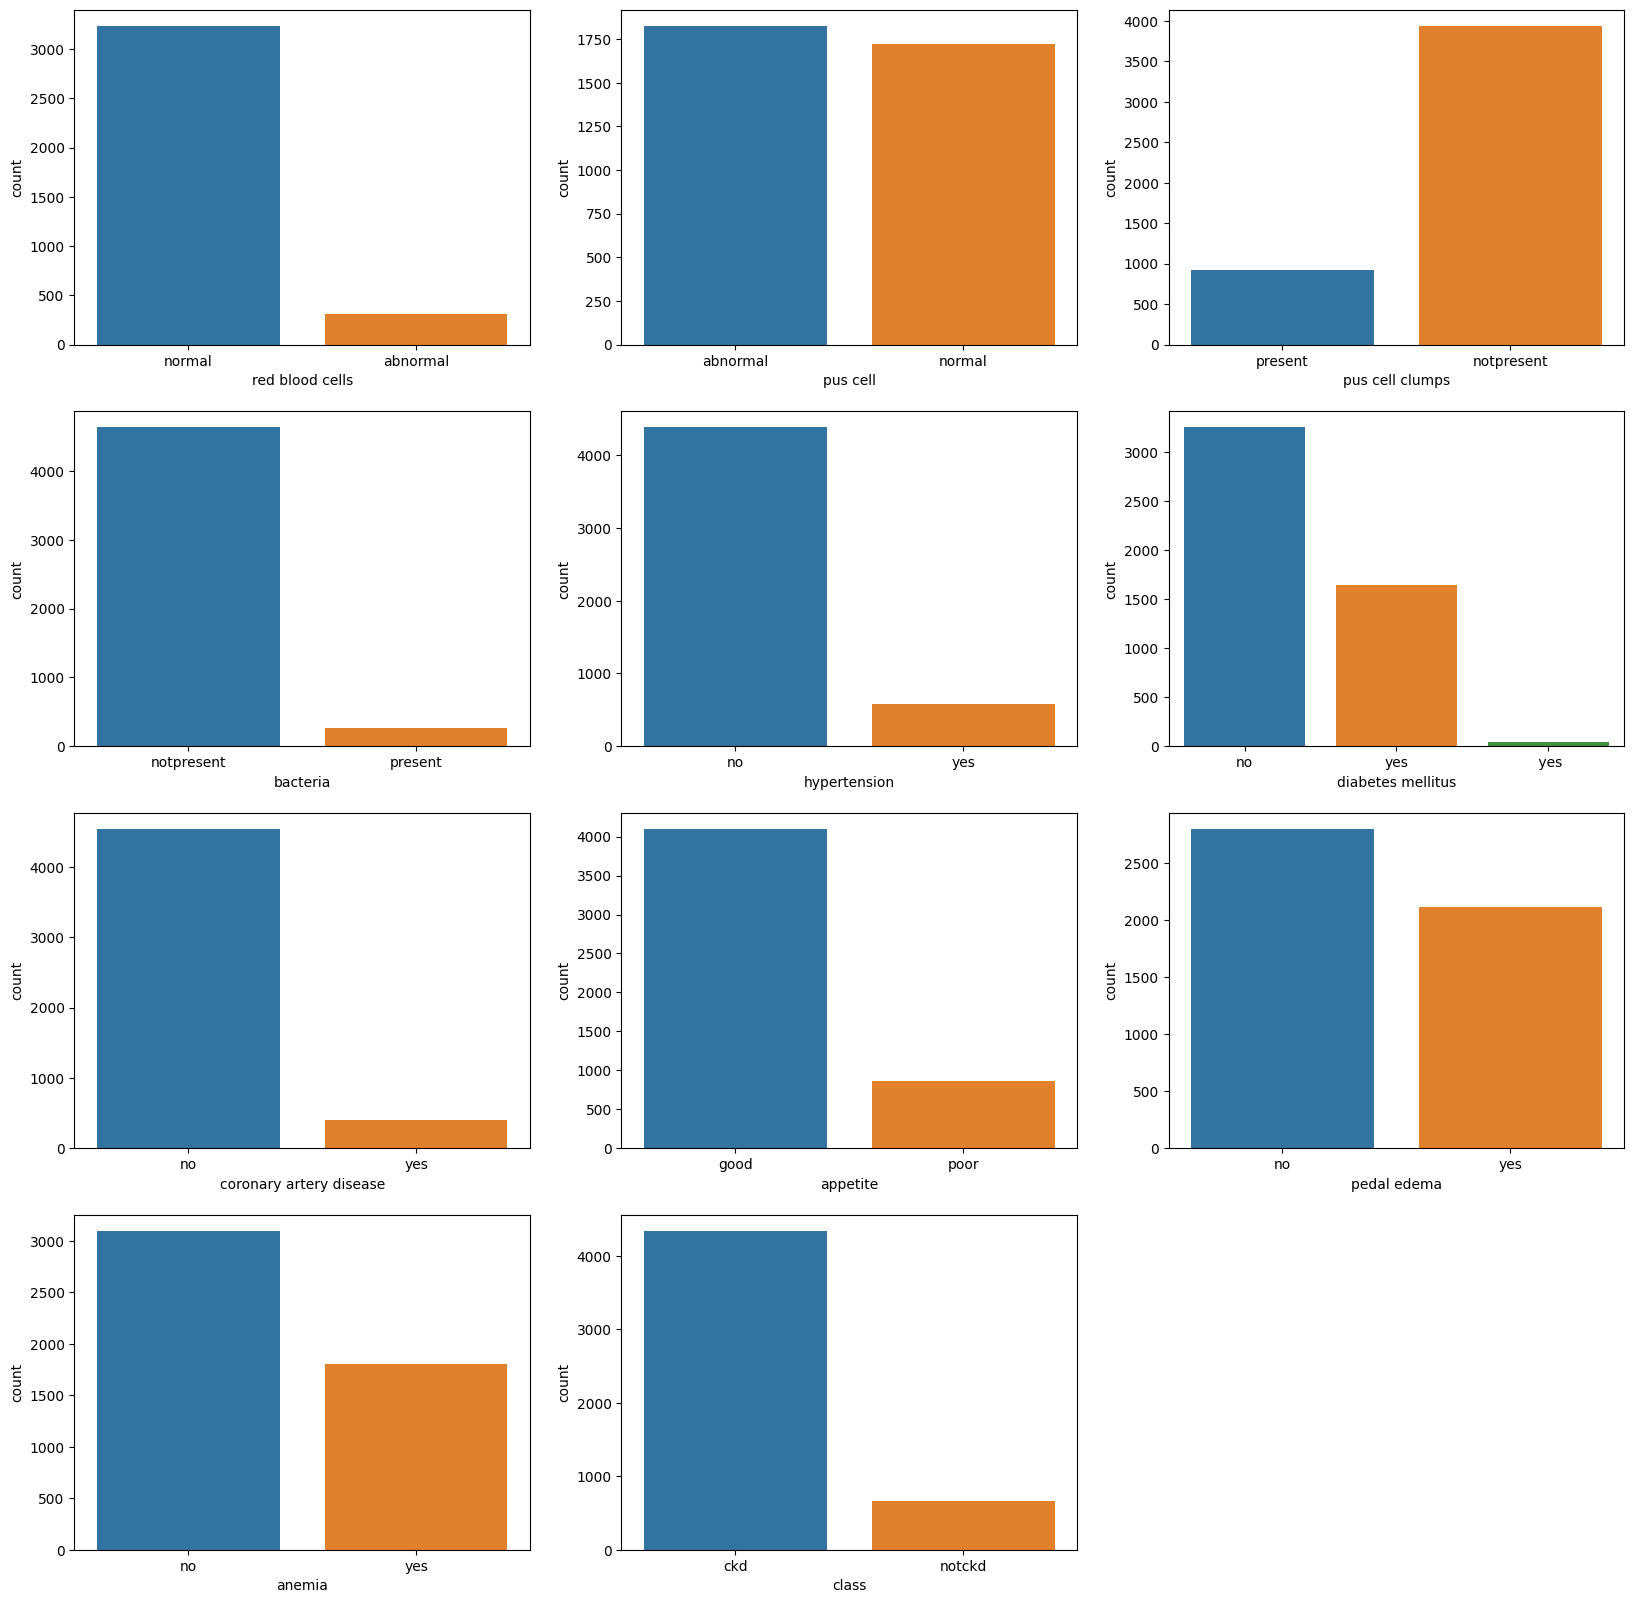

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature,data = kidney)

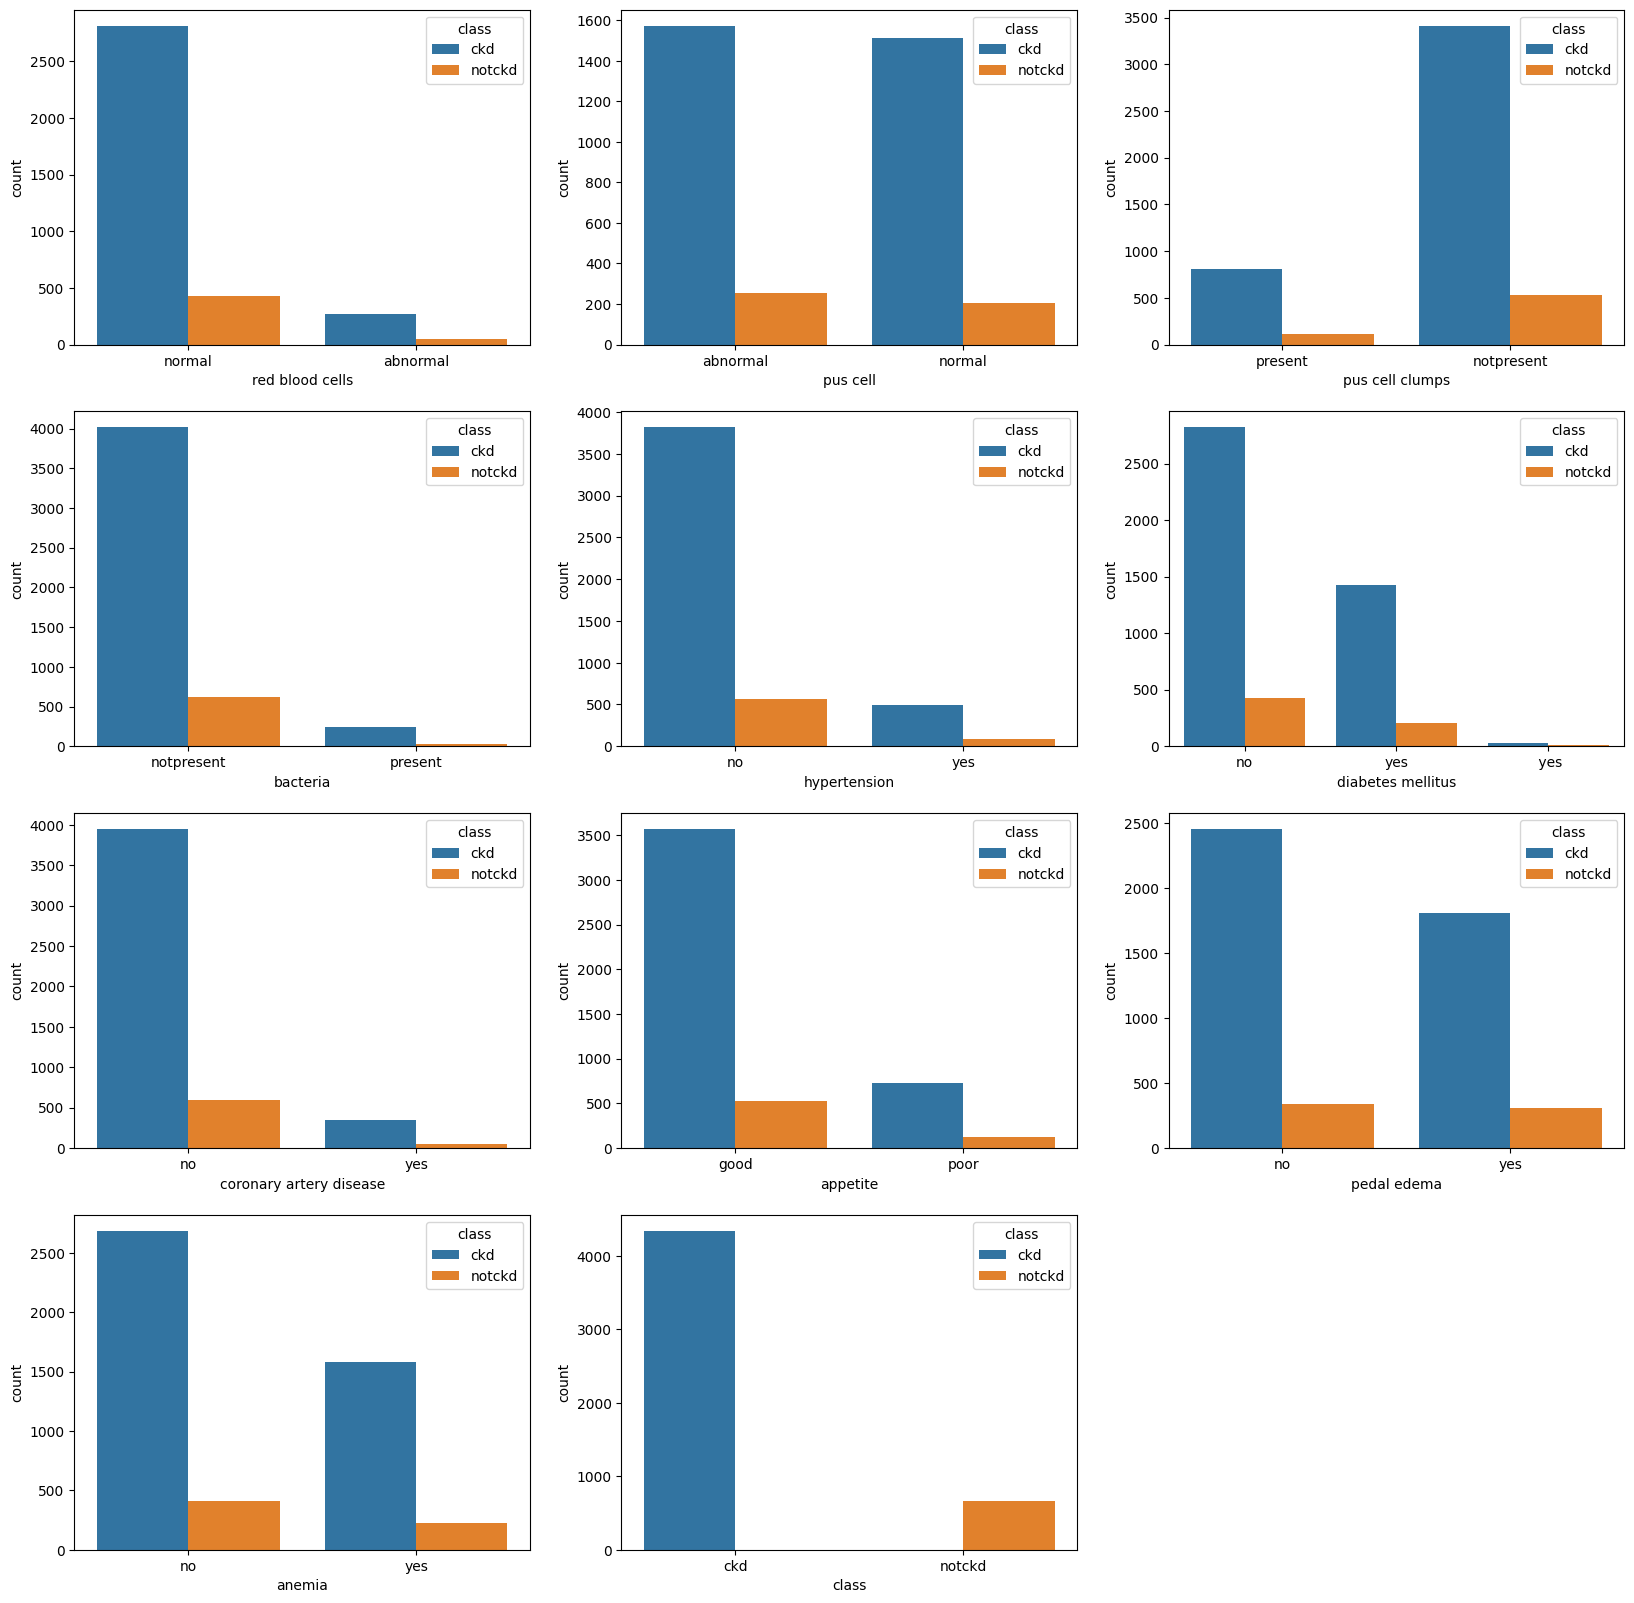

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature,hue='class',data = kidney)

<Axes: xlabel='class', ylabel='count'>

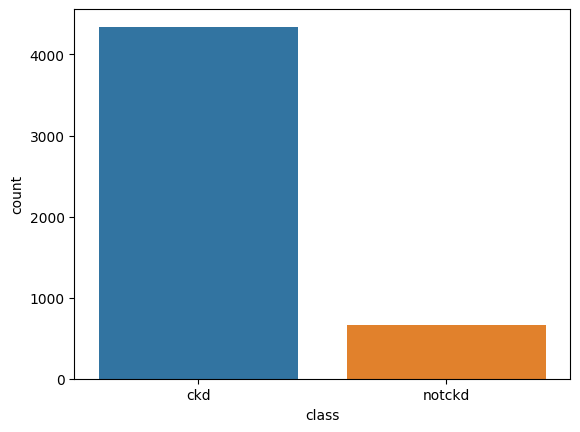

In [ ]:
sns.countplot(x = 'class',data = kidney)

## Correlation between features

In [ ]:
kidney.corr()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,-0.032150,-0.096021,-0.056445,0.051781,-0.051279,-0.090708,-0.086141,-0.073646,-0.126157,0.011333,0.003424,-0.024392,0.006984
blood pressure,-0.032150,1.000000,-0.017948,0.010921,0.021080,0.074626,-0.148974,0.027455,0.089250,0.005089,0.049729,0.002152,-0.028629,-0.014922
specific gravity,-0.096021,-0.017948,1.000000,-0.009109,-0.009265,0.040202,0.078637,0.000482,-0.061145,0.081404,0.129571,-0.016172,0.004624,-0.006477
albumin,-0.056445,0.010921,-0.009109,1.000000,0.027304,-0.072732,-0.008629,0.017605,0.037024,0.065021,-0.095840,0.009382,-0.003651,0.030043
sugar,0.051781,0.021080,-0.009265,0.027304,1.000000,-0.006440,-0.012328,0.058900,0.001185,-0.035026,-0.005342,-0.023696,-0.003233,-0.000430
blood glucose random,-0.051279,0.074626,0.040202,-0.072732,-0.006440,1.000000,-0.063149,0.052567,0.054812,0.014490,0.063680,0.010431,-0.014096,-0.009316
blood urea,-0.090708,-0.148974,0.078637,-0.008629,-0.012328,-0.063149,1.000000,0.009321,-0.062269,-0.074285,-0.131609,0.030719,0.018798,-0.005139
serum creatinine,-0.086141,0.027455,0.000482,0.017605,0.058900,0.052567,0.009321,1.000000,-0.021655,-0.051938,-0.104424,-0.004761,0.021643,-0.001465
sodium,-0.073646,0.089250,-0.061145,0.037024,0.001185,0.054812,-0.062269,-0.021655,1.000000,-0.166455,0.141619,0.004831,-0.012515,-0.021751
potassium,-0.126157,0.005089,0.081404,0.065021,-0.035026,0.014490,-0.074285,-0.051938,-0.166455,1.000000,0.035598,-0.006396,0.030915,0.006421


<Axes: >

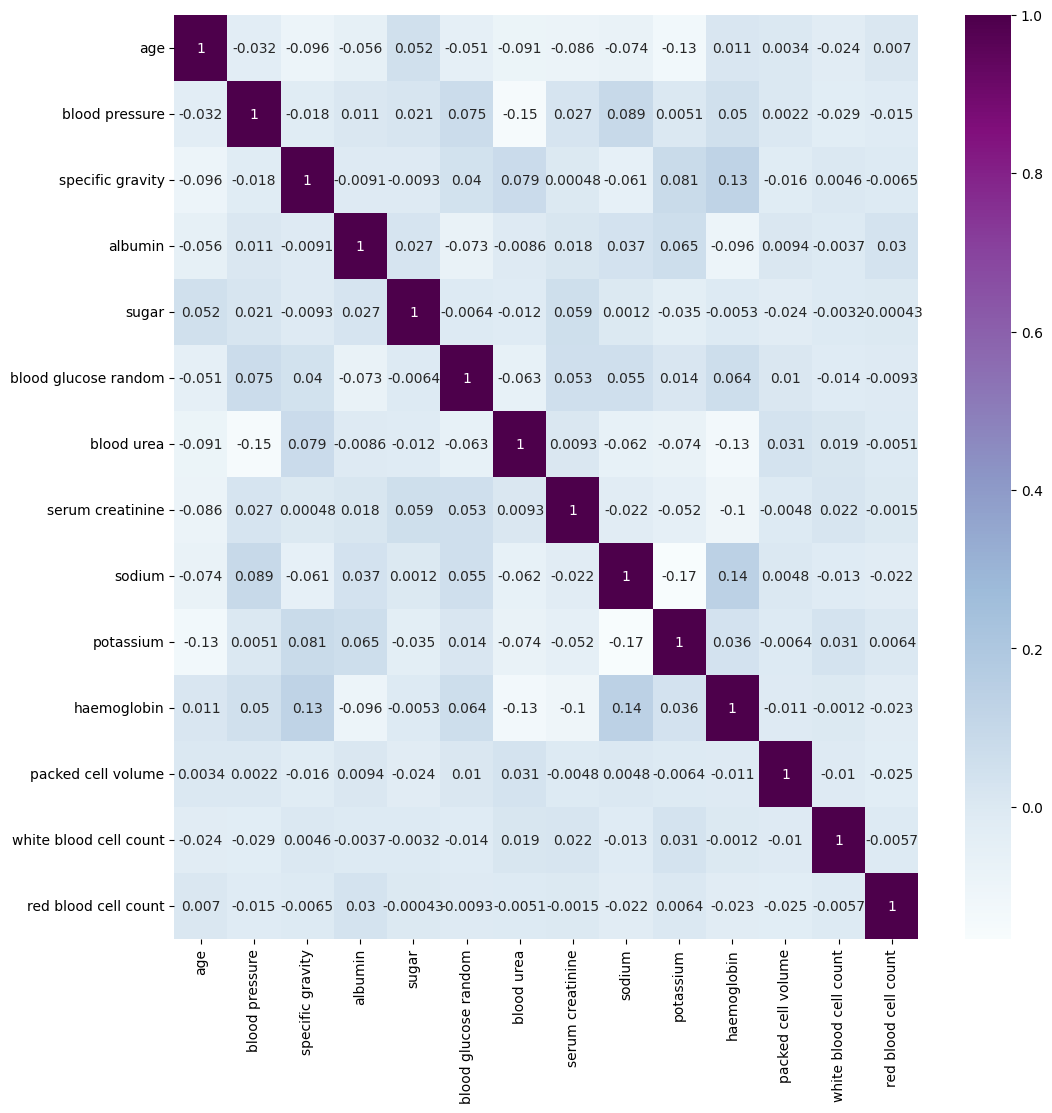

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(kidney.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

* Rbc count is positively correlated with specific gravity,haemoglobin,packed cell volume
* Rbc count is negatively correlated with albumin, blood urea
* Packed cell volume and haemoglobin are highly positive correlated
* Packed cell volume is negatively correlated with albumin and blood urea
* haemoglobin and albumin are negatively correlated

In [ ]:
kidney.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd       151  4.632450     4.7  2.1  6.5
                notckd     23  4.495652     4.7  2.4  6.5
normal          ckd      1363  4.699413     4.8  2.1  8.0
                notckd    216  4.630093     4.8  2.1  6.5

We can observe that when a person is not diseased its rbc count is 134, mean is also high whereas when he is diseased count drop downs to 25-40 and mean is low.

#### Relationship between haemoglobin and packed cell volume

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

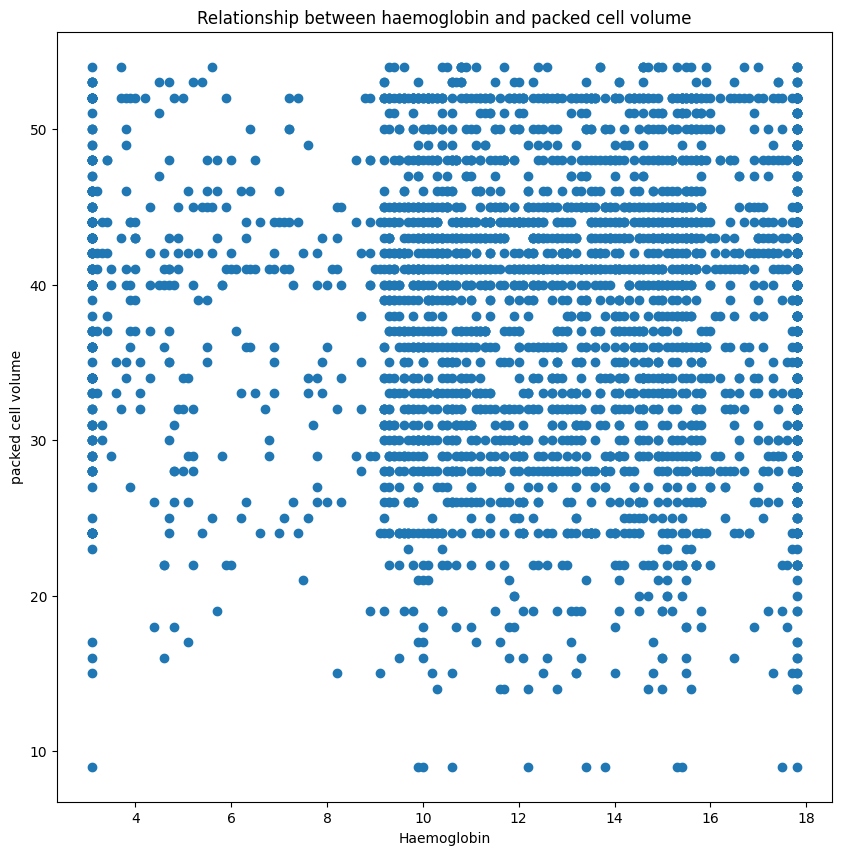

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=kidney.haemoglobin,y=kidney['packed cell volume'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')


We can see that there is a linear relationship between haemoglobin and pacled cell volume

### Analyse distribution of red blood cell count chronic as well as non chronic

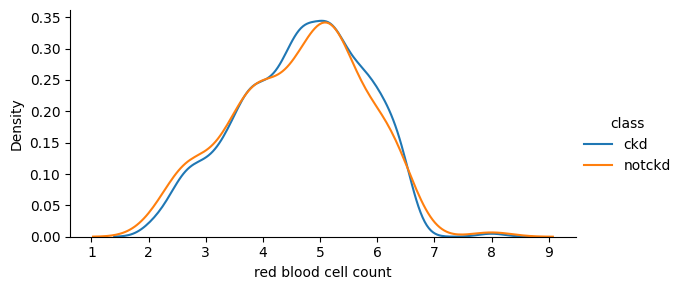

In [ ]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

from above visuals we can say that person with lower rbc count have high chances of having chronic disease

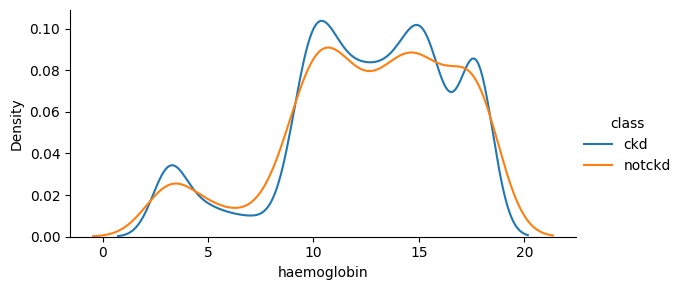

In [ ]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'haemoglobin')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

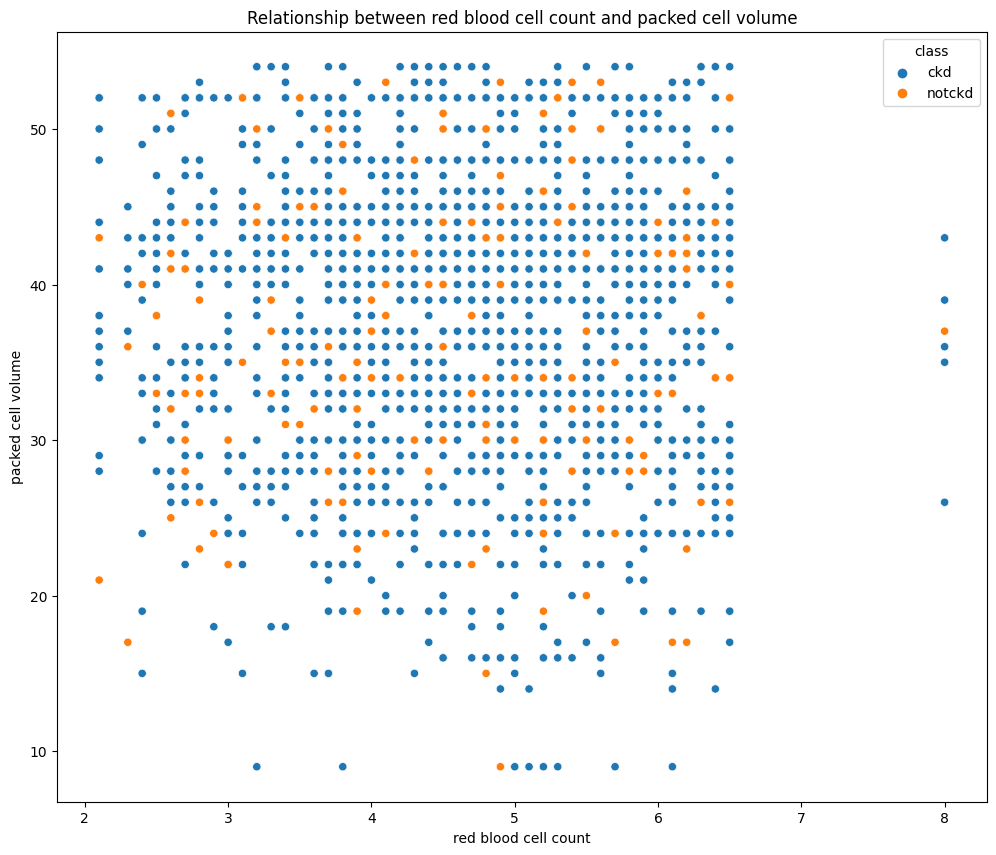

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['packed cell volume'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')


Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

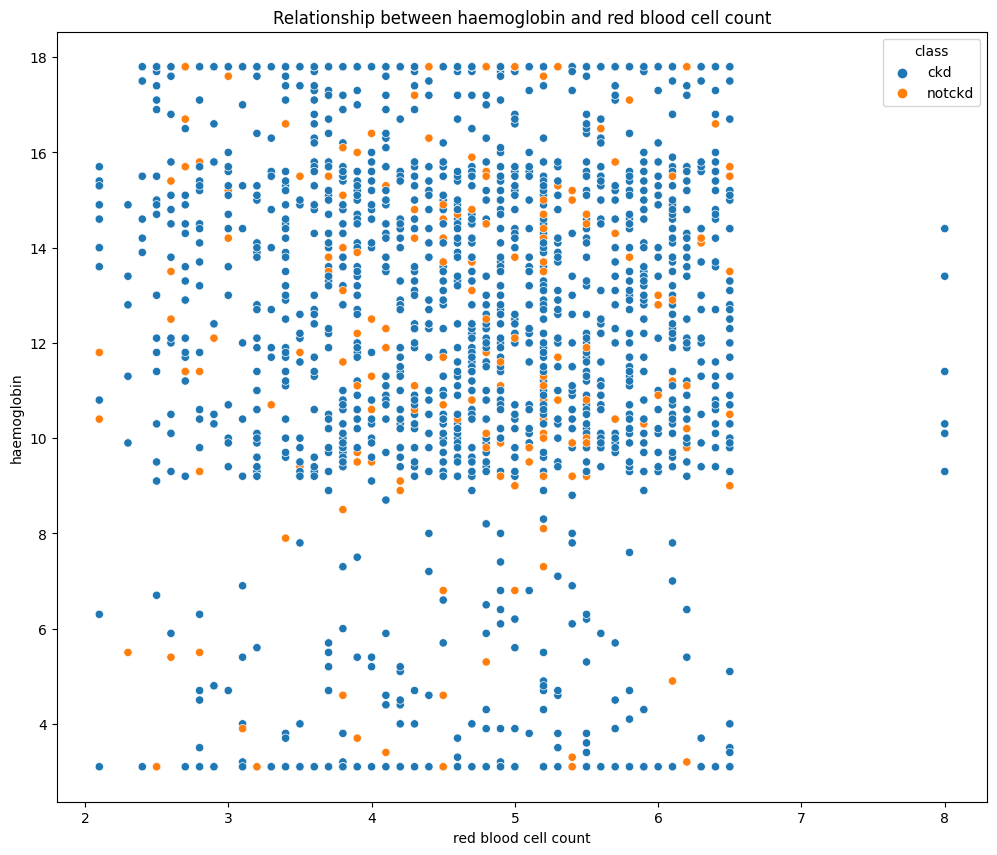

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['haemoglobin'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

* We can see that there is some kind of linearity in all the relationships
* Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

## Handling Missing Values

In [ ]:
kidney.isnull().sum()

age                         137
blood pressure              282
specific gravity           1875
albumin                    1002
sugar                      1290
red blood cells            1450
pus cell                   1452
pus cell clumps             134
bacteria                     97
blood glucose random        314
blood urea                  231
serum creatinine            197
sodium                     1301
potassium                   717
haemoglobin                1154
packed cell volume          779
white blood cell count     1050
red blood cell count       2536
hypertension                 40
diabetes mellitus            70
coronary artery disease      63
appetite                     48
pedal edema                  90
anemia                       96
class                         0
dtype: int64

In [ ]:
kidney.isnull().sum().sort_values(ascending=False)

red blood cell count       2536
specific gravity           1875
pus cell                   1452
red blood cells            1450
sodium                     1301
sugar                      1290
haemoglobin                1154
white blood cell count     1050
albumin                    1002
packed cell volume          779
potassium                   717
blood glucose random        314
blood pressure              282
blood urea                  231
serum creatinine            197
age                         137
pus cell clumps             134
bacteria                     97
anemia                       96
pedal edema                  90
diabetes mellitus            70
coronary artery disease      63
appetite                     48
hypertension                 40
class                         0
dtype: int64

We can fill this missing values with mean,median or std deviat

<Axes: xlabel='class', ylabel='age'>

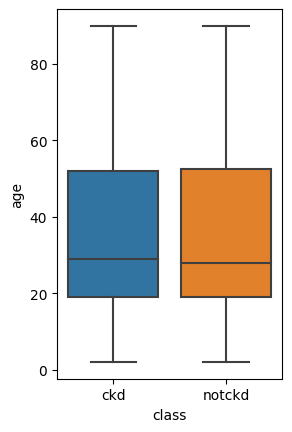

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['class'],y=kidney['age'])

<Axes: xlabel='class', ylabel='age'>

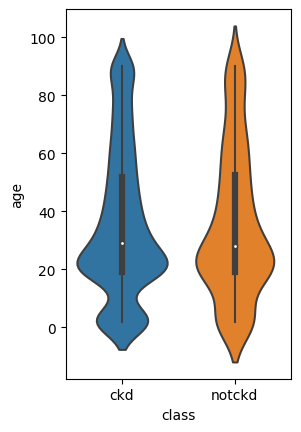

In [ ]:
plt.subplot(1,2,1)
sns.violinplot(x=kidney['class'],y=kidney['age'])

In [ ]:
list(enumerate(cat_col))

[(0, 'red blood cells'),
 (1, 'pus cell'),
 (2, 'pus cell clumps'),
 (3, 'bacteria'),
 (4, 'hypertension'),
 (5, 'diabetes mellitus'),
 (6, 'coronary artery disease'),
 (7, 'appetite'),
 (8, 'pedal edema'),
 (9, 'anemia'),
 (10, 'class')]

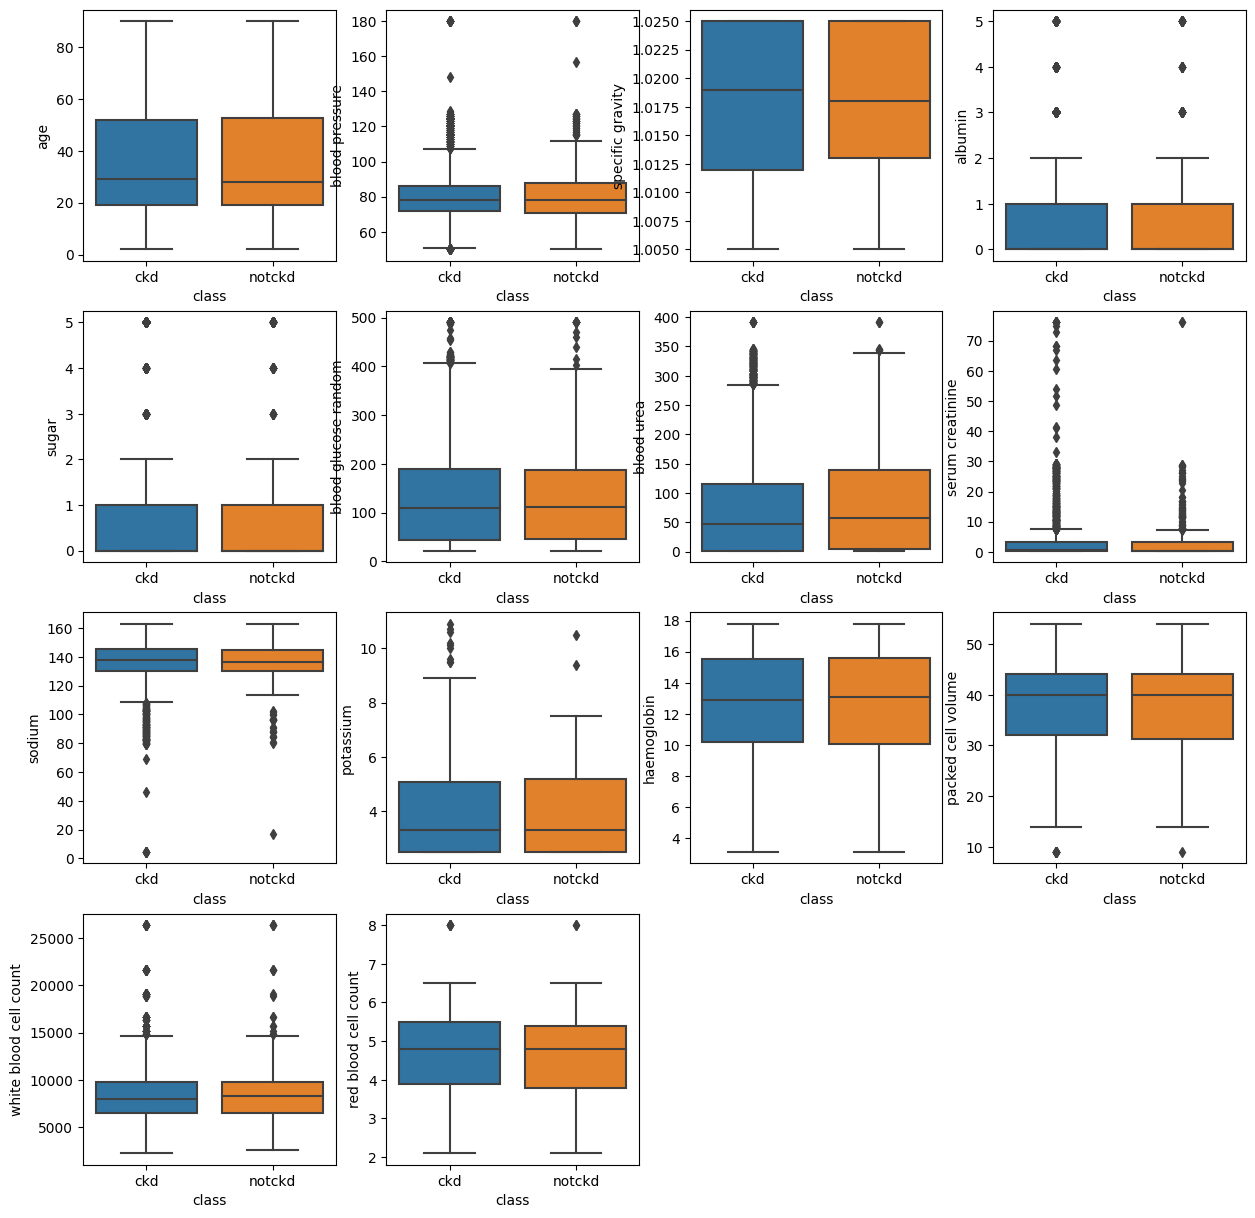

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['class'],y=i[1],data=kidney.reset_index())

there are outliers in dataset so filling missing values with mean is not feasible , i will use median to fill missing values

In [ ]:
np.mean(kidney)

age                         35.549249
blood pressure              81.484103
specific gravity             1.017561
albumin                      0.882191
sugar                        1.059569
blood glucose random       130.468630
blood urea                  80.630027
serum creatinine             3.272655
sodium                     136.826764
potassium                    3.885781
haemoglobin                 12.507228
packed cell volume          38.217484
white blood cell count    8435.291139
red blood cell count         4.675609
dtype: float64

In [ ]:
kidney.isnull().sum()

age                         137
blood pressure              282
specific gravity           1875
albumin                    1002
sugar                      1290
red blood cells            1450
pus cell                   1452
pus cell clumps             134
bacteria                     97
blood glucose random        314
blood urea                  231
serum creatinine            197
sodium                     1301
potassium                   717
haemoglobin                1154
packed cell volume          779
white blood cell count     1050
red blood cell count       2536
hypertension                 40
diabetes mellitus            70
coronary artery disease      63
appetite                     48
pedal edema                  90
anemia                       96
class                         0
dtype: int64

In [ ]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)

In [ ]:
kidney.isnull().sum()

age                           0
blood pressure                0
specific gravity              0
albumin                       0
sugar                         0
red blood cells            1450
pus cell                   1452
pus cell clumps             134
bacteria                     97
blood glucose random          0
blood urea                    0
serum creatinine              0
sodium                        0
potassium                     0
haemoglobin                   0
packed cell volume            0
white blood cell count        0
red blood cell count          0
hypertension                 40
diabetes mellitus            70
coronary artery disease      63
appetite                     48
pedal edema                  90
anemia                       96
class                         0
dtype: int64

In [ ]:
kidney.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,35.342400,81.287600,1.017726,0.705400,0.786200,129.24600,79.136380,3.163806,137.053980,3.801780,12.597880,38.495200,8343.880000,4.73870
std,25.111138,15.965321,0.005329,1.201041,1.603684,100.03667,91.652589,6.770937,14.191493,1.399138,3.518119,8.406433,2593.115384,0.76828
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.00000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.10000
25%,19.000000,72.000000,1.017000,0.000000,0.000000,47.00000,1.500000,0.400000,132.300000,2.500000,10.800000,33.000000,6900.000000,4.80000
50%,28.000000,78.000000,1.018000,0.000000,0.000000,111.00000,48.300000,0.510000,137.700000,3.300000,12.900000,40.000000,8000.000000,4.80000
75%,51.000000,86.000000,1.021000,1.000000,1.000000,184.00000,110.425000,3.160000,143.100000,4.800000,14.900000,44.000000,9500.000000,4.80000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.00000,391.000000,76.000000,163.000000,10.900000,17.800000,54.000000,26400.000000,8.00000


## Filling missing values in categorical columns using random values

It was more important to find the missing values and need to clean thos emissing values by using different menthods. ( I've dropped the NULL Values ). Missing Values leads to False Output and sometimes cause many Problems while Evaluating our Model.

![image](https://datascience.foundation/backend/web/uploads/blog/missing-data09-28-2017_015846.jpg)

In [ ]:
kidney['red blood cells'].isnull().sum()

1450

In [ ]:
random_sample=kidney['red blood cells'].dropna().sample(1450)

In [ ]:
random_sample

1291    abnormal
470       normal
1493      normal
2884      normal
3668      normal
          ...   
957       normal
4354      normal
1132      normal
2757      normal
1515      normal
Name: red blood cells, Length: 1450, dtype: object

In [ ]:
kidney[kidney['red blood cells'].isnull()].index

Int64Index([   1,    8,    9,   17,   19,   20,   22,   24,   29,   33,
            ...
            4965, 4972, 4975, 4976, 4982, 4984, 4987, 4988, 4997, 4998],
           dtype='int64', length=1450)

In [ ]:
random_sample.index

Int64Index([1291,  470, 1493, 2884, 3668, 3190, 1483, 2062, 4170, 4288,
            ...
            1011, 1792, 2938, 4326, 2900,  957, 4354, 1132, 2757, 1515],
           dtype='int64', length=1450)

We can see that indexes are different , while putting random values indexes must be equal

In [ ]:
random_sample.index=kidney[kidney['red blood cells'].isnull()].index    #in this way index will be equal

In [ ]:
random_sample.index

Int64Index([   1,    8,    9,   17,   19,   20,   22,   24,   29,   33,
            ...
            4965, 4972, 4975, 4976, 4982, 4984, 4987, 4988, 4997, 4998],
           dtype='int64', length=1450)

In [ ]:
kidney.loc[kidney['red blood cells'].isnull(),'red blood cells']=random_sample

In [ ]:
kidney.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,36.0,93.0,1.014,2.0,0.0,normal,abnormal,present,notpresent,56.0,...,40.0,8000.0,3.9,no,no,no,good,no,no,ckd
1,2.0,85.0,1.018,1.0,0.0,abnormal,normal,notpresent,notpresent,95.0,...,35.0,8000.0,4.8,no,yes,no,good,no,no,ckd
2,3.0,65.0,1.018,0.0,0.0,normal,NaN,notpresent,notpresent,186.0,...,36.0,6000.0,5.2,yes,no,no,good,no,no,notckd
3,79.0,69.0,1.018,1.0,0.0,normal,abnormal,notpresent,notpresent,170.0,...,35.0,8000.0,4.8,yes,no,yes,good,yes,yes,ckd
4,46.0,76.0,1.018,0.0,0.0,normal,NaN,notpresent,notpresent,209.0,...,41.0,8000.0,4.1,no,no,no,good,no,no,ckd


In [ ]:
kidney['red blood cells'].isnull().sum()

0

<Axes: xlabel='red blood cells', ylabel='count'>

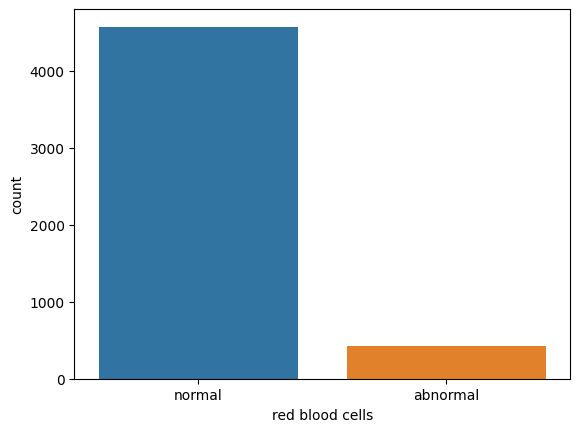

In [ ]:
sns.countplot(x='red blood cells',data=kidney)       # checking that ratio didnt change after filling missing values

ratio didnt changed

In [ ]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):
    random_sample=kidney[feature].dropna().sample(kidney[feature].isnull().sum())
    random_sample.index=kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature]=random_sample

In [ ]:
Random_value_Imputation('pus cell')     #only this column because it has higher no. of missing value

In [ ]:
kidney.isnull().sum()

age                          0
blood pressure               0
specific gravity             0
albumin                      0
sugar                        0
red blood cells              0
pus cell                     0
pus cell clumps            134
bacteria                    97
blood glucose random         0
blood urea                   0
serum creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed cell volume           0
white blood cell count       0
red blood cell count         0
hypertension                40
diabetes mellitus           70
coronary artery disease     63
appetite                    48
pedal edema                 90
anemia                      96
class                        0
dtype: int64

Those categorical variables who have less no. of missing values then we can replace it with mode

In [ ]:
def impute_mode(feature):
    mode=kidney[feature].mode()[0]
    kidney[feature]=kidney[feature].fillna(mode)

In [ ]:
for col in cat_col:
    impute_mode(col)

In [ ]:
kidney[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
kidney.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

We can see that there is no missing value now

## Performing the Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [ ]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


## Label Encoding  ---> Because there are less no. of categories in each column

### LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

- normal -- 0
- abnormal --1

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])

In [ ]:
kidney.shape

(5000, 25)

In [ ]:
kidney.to_csv("cleaned_data.csv")

## Selecting important features

- **SelectKBest**: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

- **chi2**: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.

![image](https://media.geeksforgeeks.org/wp-content/uploads/20190318131202/chi2-form.jpg)

# XGBoost Classifier - For our Model

- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

![image](https://miro.medium.com/max/1400/1*FLshv-wVDfu-i54OqvZdHg.png)